# Réflexions sur la suite logistique


On considère la suite de réels $x_i$ définie par la relation de récurrence suivante :

$$ x_{i+1} = r (1-x_i)x_i $$

avec $r$ compris entre 1 et 4, et que l'on appelle « l'équation logistique ».

Pour l'étude de cette équation, on introduit la fonction :

$$ f(x) = r (1-x) x $$

dont le seul paramètre est donc $r$. Nous allons voir que suivant les valeurs de $r$, le comportement asymptotique de la suite $ x_{i+1} = f(x_i) $ présente un comportement chaotique. 

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

## Part 1 le début

Commencons par regarder le comportement de la suite $x_i$ pour quelques valeurs de $r$. Pour cela on définit d'abord les fonctions permettant d'afficher la suite dans un diagramme "en escalier".

In [2]:
# Définition des fonctions
def f(x,r):
    """
    fonction logistique
    """
    return r*(1-x)*x

def suite(z0,N,r,lafonction=f):
    """
    retourne la suite de N termes x_i commençant à x_0
    """
    z=np.empty(N)
    z[0]=z0
    for i in range(N-1):
        z[i+1]=lafonction(z[i],r)
    return z

def suitegraph(z):
    """
    prend la suite z_i et retourne a_i et b_i pour afficher sous la forme d'un diagramme z_i+1 vs z_i
    """
    N=len(z)
    a=[]
    b=[]
    for i in range(N-1):
        a.append(z[i])
        a.append(z[i])
        b.append(z[i])
        b.append(z[i+1])
    return np.array(a),np.array(b)
        

On affiche ensuite le résultat pour quelques valeurs de $r$, et un certains nombres de termes dans la suite. On affiche dans un plan $z_{i+1}$ en fonction de $z_i$ avec les deux courbes $y=x$ et $y=f(x)$

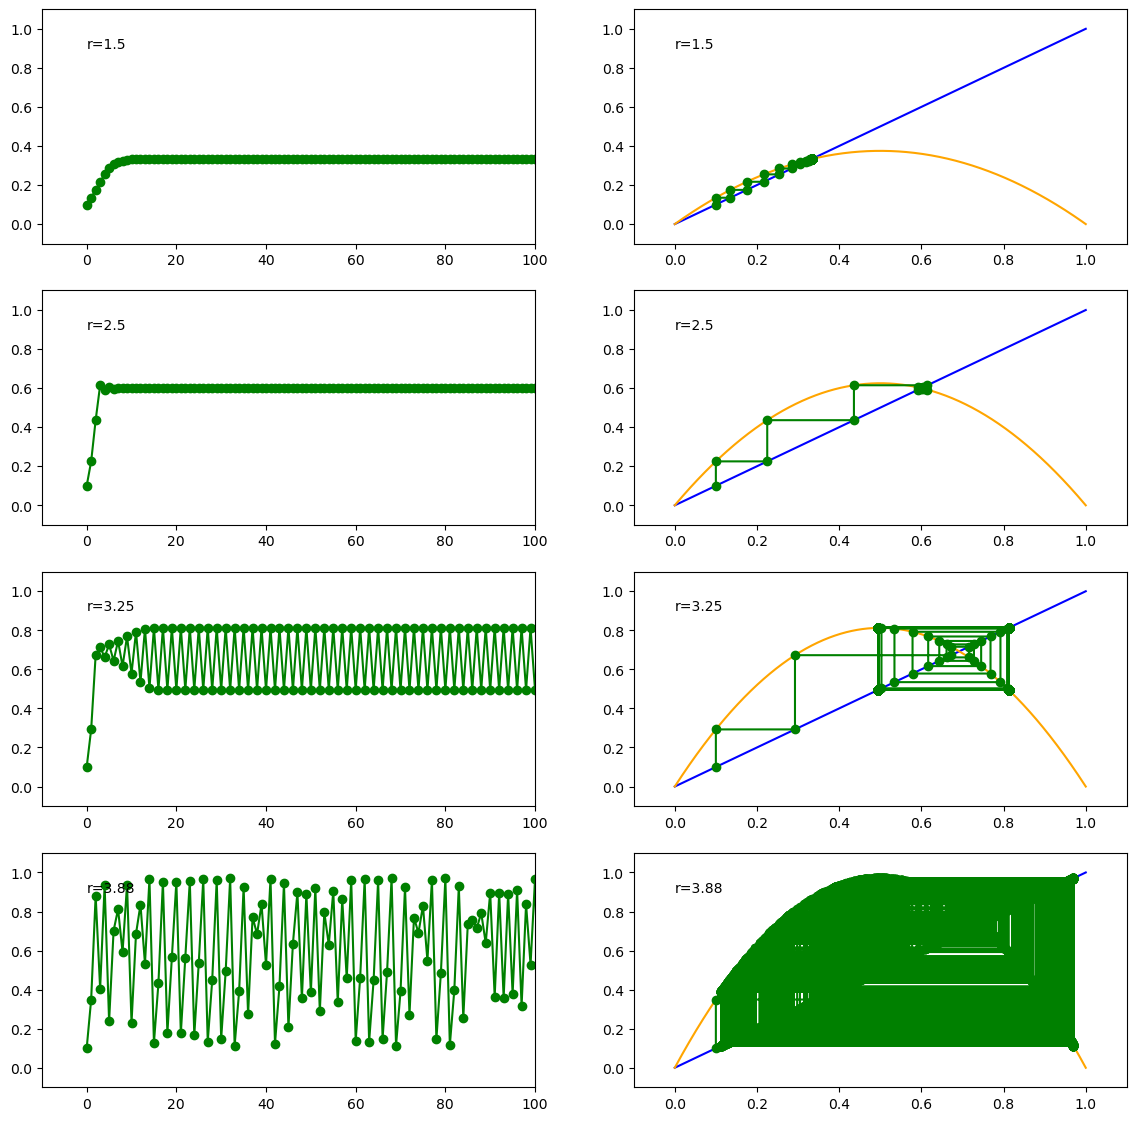

In [3]:
N = 1000 # nombre de termes       
x=np.linspace(0,1,N) #pour afficher f(x)

fig, axes = plt.subplots(4,2,figsize=(14,14))
rlist=[1.5,2.5,3.25,3.88]

for i in range(4):
    r=rlist[i]
    z=suite(0.1,N,r)
    a,b=suitegraph(z)
    
    cax=axes[i,0]
    cax.plot(z,'-o',color='g')
    cax.text(0.0,0.9,"r="+str(int(r*10000)/10000.0))
    cax.set_xlim(-10,100)
    cax.set_ylim(-0.1,1.1)
    
    cax=axes[i,1]
    cax.plot(x,x,'-b')
    cax.plot(x,f(x,r),'-',color='orange')
    cax.plot(a,b,'-o',color='g')
    cax.text(0.0,0.9,"r="+str(int(r*10000)/10000.0))
    cax.set_xlim(-0.1,1.1)
    cax.set_ylim(-0.1,1.1)
plt.tight_layout
plt.show()

Il est parfois difficile de comprendre ce qui se passe, alors, on affichera que les 100 derniers termes de la suite.

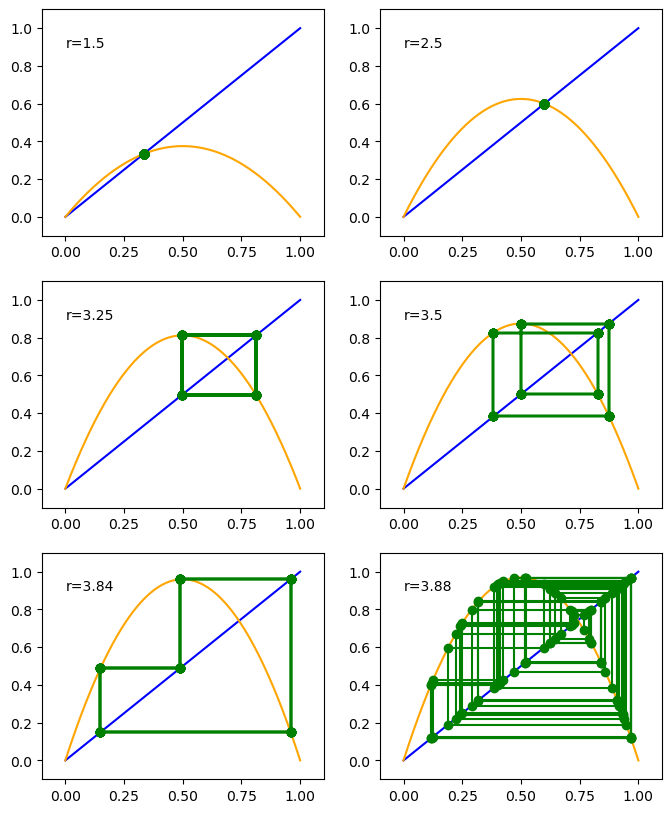

In [4]:
N = 1000 # nombre de termes       
Naff=100 # nb de termes affichés
x=np.linspace(0,1,N) #pour afficher f(x)

fig, axes = plt.subplots(3,2,figsize=(8,10))
rlist=[1.5,2.5,3.25,3.5,3.84,3.88]

for i in range(6):
    r=rlist[i]
    cax=axes[i//2,i%2]
    cax.plot(x,x,'-b')
    cax.plot(x,f(x,r),'-',color='orange')
    z=suite(0.1,N,r)
    a,b=suitegraph(z)
    cax.plot(a[-Naff:],b[-Naff:],'-o',color='g')
    cax.text(0.0,0.9,"r="+str(int(r*10000)/10000.0))
    cax.set_xlim(-0.1,1.1)
    cax.set_ylim(-0.1,1.1)
plt.tight_layout
plt.show()

On remarque que pour certaines valeurs, la suite converge vers le point fixe $x=f(x)$ alors que pour certaines valeurs on oscille entre 2 valeurs ($r=$3.25), 3 valeurs (3.84), 4 valeurs (3.5), ou apparement pas de comportement régulier.

Plutot que de multiplier les graphes pour les inombrables valeurs de $r$ possibles, nous allons construire un diagramme représentant les derniers points de la suite en fonction de $r$. C'est ce qu'on appelle le diagramme de bifurcation.

## Part 2 : le diagramme de bifurcation

on construit ici le diagramme de bifurcation, c'est à dire les valeurs "finales" des suites logistiques en fonction de $r$.

In [5]:
# on définit les valeurs de r possibles

rliste=np.arange(1,4,0.001)

# puis on calcule pour chaque r la liste des 100 derniers point d'une suite de 1000 itérations
N=1000
Naff=100

findesuite=np.empty(len(rliste)*Naff).reshape(len(rliste),Naff)

debut = time.time()

for i in range(len(rliste)):
    findesuite[i]=suite(0.1,N,rliste[i])[-Naff:]

print("temps écoulé :", time.time()-debut)


temps écoulé : 2.166210651397705


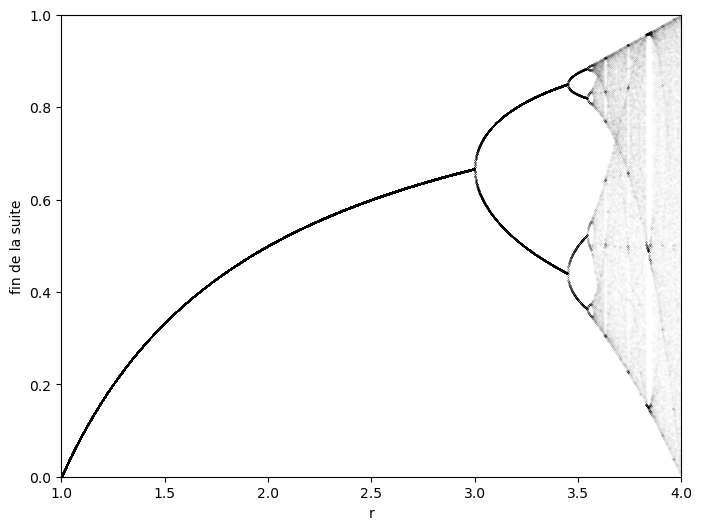

In [6]:
""" pour gagner du temps, on sépare la cellule de calcul et la cellule de plot"""

fig=plt.subplots(figsize=(8,6))
plt.plot(rliste,findesuite,'.',markersize=0.02,color='black')
plt.xlim(1,4)
plt.ylim(0,1)
plt.xlabel("r")
plt.ylabel("fin de la suite")
plt.show()


On retrouve certains comportement vus précédemment, pour certaines plages de $r$ une seule valeur est possible, pour d'autres 2, 3, voir plus, pour d'autres encore il semble difficile de trouver un comportement régulier.


## Part 2 Exposant de Lyapunov

On cherche ici à calculer l'exposant de Lyapunov à partir de l'expression :

$$ \lambda = \lim\limits_{n \rightarrow \infty} \frac{1}{n} \sum_{i=0}^{n-1} \log | f^{\prime} (x_i)| $$


In [7]:
# Définition des fonctions
def fprime(x,r):
    """
    fonction logistique
    """
    return r*(1-2*x)

In [8]:
rliste=np.arange(1,4,0.001)
lam=[]
N=1000
for r in rliste:
    x=suite(0.1,N,r)
    xprime=np.abs(fprime(x,r))
    lam.append(np.sum(np.log(xprime))/N)
lam=np.array(lam)

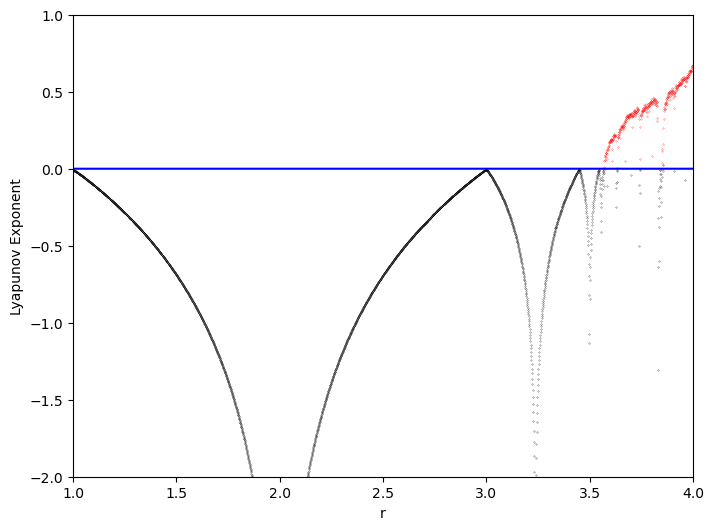

In [9]:
fig=plt.subplots(figsize=(8,6))
plt.plot(rliste[lam<0],lam[lam<0],'o',markersize=0.2,color='black')
plt.plot(rliste[lam>0],lam[lam>0],'o',markersize=0.2,color='red')
plt.plot(rliste,np.zeros(len(rliste)),'-',color='blue')
plt.xlim(1,4)
plt.ylim(-2,1)
plt.xlabel("r")
plt.ylabel("Lyapunov Exponent")
plt.show()

On voit bien que l'exposant est négatif quand le comportement de la suite est "déterministe" (ie converge vers une valeur ou oscille entre plusieurs valeurs) et positif autrement.

## Part 3 Bonus

### Diagramme fractal

On peut montrer ici que le diagramme de bifurcation a des caractéristiques fractales, la figure globale étant répétée localement en plus petit.

La cellule suivante permet de calculer (avec un peu de temps) 3 plages de $r$ choisies de largeur décroissantes.

In [10]:
N=1000
Naff=100

debut=time.time()

rlist=np.arange(1.0,4,0.001)
endline=np.empty(len(rlist)*100).reshape(len(rlist),100)

for k in range(len(rlist)):
    r=rlist[k]
    endline[k]=suite(0.01,N,r)[-Naff:]

print("calcul 1 :",time.time()-debut)

debut=time.time()

rlist2=np.arange(3.0,3.68,0.0001)
endline2=np.empty(len(rlist2)*100).reshape(len(rlist2),100)

for k in range(len(rlist2)):
    r=rlist2[k]
    endline2[k]=suite(0.01,N,r)[-Naff:]
    
print("calcul 2 :",time.time()-debut)

debut=time.time()

rlist3=np.arange(3.45,3.593,0.00001)
endline3=np.empty(len(rlist3)*100).reshape(len(rlist3),100)

for k in range(len(rlist3)):
    r=rlist3[k]
    endline3[k]=suite(0.01,N,r)[-Naff:]
    
print("calcul 3 :",time.time()-debut)


calcul 1 : 2.1240766048431396
calcul 2 : 4.892046928405762
calcul 3 : 10.075061559677124


On peut maintenant afficher ces trois graphes : le deuxième est un zoom de l'encadré rouge du premier, et le troisième un zoom du deuxième.

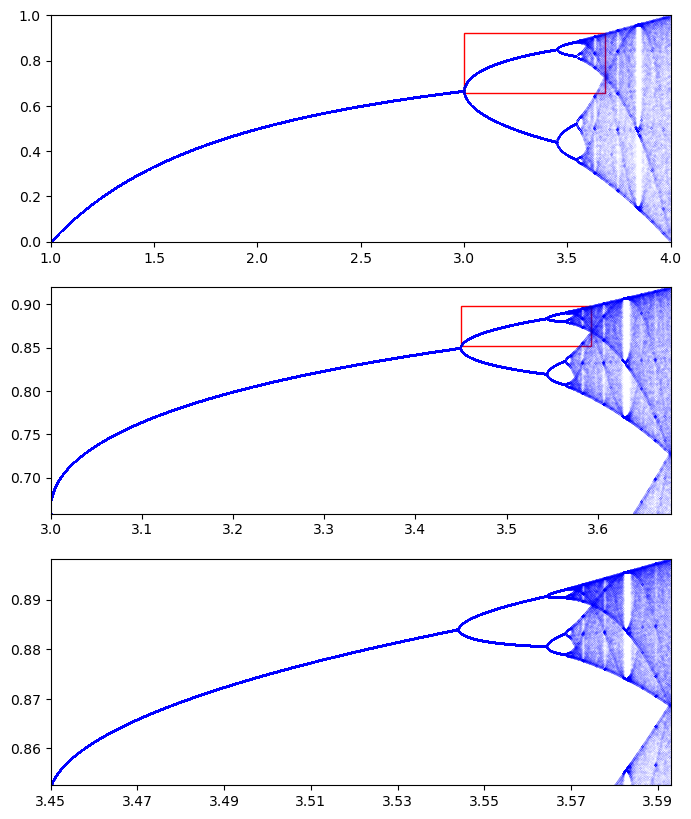

In [11]:
fig=plt.subplots(figsize=(8,10))

ax1=plt.subplot(311)
ax1.plot(rlist,endline,'ob',markersize=0.02)
ax1.set_xlim(1.0,4.0)
ax1.set_ylim(0,1)
ax1.set_xticks(np.arange(1.0,4.1,0.5))
ax1.set_yticks(np.arange(0,1.1,0.2))
ax1.add_patch(Rectangle((3.0,endline2[0,0]),3.68-3.0,max(endline2[-1])-endline2[0,0],linewidth=1, edgecolor='r', facecolor='none'))

ax2=plt.subplot(312)
ax2.plot(rlist2,endline2,'ob',markersize=0.02)
ax2.set_xlim(3.0,3.68)
ax2.set_ylim(endline2[0,0],max(endline2[-1]))
ax2.set_xticks(np.arange(3.0,3.681,0.1))
ax2.set_yticks(np.arange(0.7,0.91,0.05))
ax2.add_patch(Rectangle((3.45,max(endline3[0])),3.593-3.45,max(endline3[-1])-max(endline3[0]),linewidth=1, edgecolor='r', facecolor='none'))

ax3=plt.subplot(313)
ax3.plot(rlist3,endline3,'ob',markersize=0.02)
ax3.set_xlim(3.45,3.593)
ax3.set_ylim(max(endline3[0]),max(endline3[-1]))
ax3.set_xticks(np.arange(3.45,3.591,0.02))
ax3.set_yticks(np.arange(0.86,0.891,0.01))

plt.show()

On voit bien ici le coté fractal. On peut aussi retrouver le même schéma dans d'autres parties du diagramme, comme par exemple autour de $r=3.85$ dont le calcul est montré ci-dessous.

In [12]:
N=1000
Naff=100

debut=time.time()
rlist=np.arange(3.8,3.9,0.00005)
endline=np.empty(len(rlist)*Naff).reshape(len(rlist),Naff)

for k in range(len(rlist)):
    r=rlist[k]
    endline[k]=suite(0.01,N,r)[-Naff:]
print("premier calcul :",time.time()-debut)

debut=time.time()
rlist2=np.arange(3.84,3.86,0.00001)
endline2=np.empty(len(rlist2)*100).reshape(len(rlist2),100)
rlistr=np.array([])
endliner=np.array([])
rlistg=np.array([])
endlineg=np.array([])
rlistb=np.array([])
endlineb=np.array([])


for k in range(len(rlist2)):
    r=rlist2[k]
    endline2[k]=suite(0.01,N,r)[-Naff:]
    rlistr=np.append(rlistr,r*np.ones(len(endline2[k][(endline2[k]>0.12) & (endline2[k]<0.2)])))
    endliner=np.append(endliner,endline2[k][(endline2[k]>0.12) & (endline2[k]<0.2)])
    rlistg=np.append(rlistg,r*np.ones(len(endline2[k][(endline2[k]>0.4) & (endline2[k]<0.6)])))
    endlineg=np.append(endlineg,endline2[k][(endline2[k]>0.4) & (endline2[k]<0.6)])
    rlistb=np.append(rlistb,r*np.ones(len(endline2[k][(endline2[k]>0.948) & (endline2[k]<0.97)])))
    endlineb=np.append(endlineb,endline2[k][(endline2[k]>0.948) & (endline2[k]<0.97)])
    
print("second calcul :",time.time()-debut)


premier calcul : 1.4160337448120117
second calcul : 1.6992945671081543


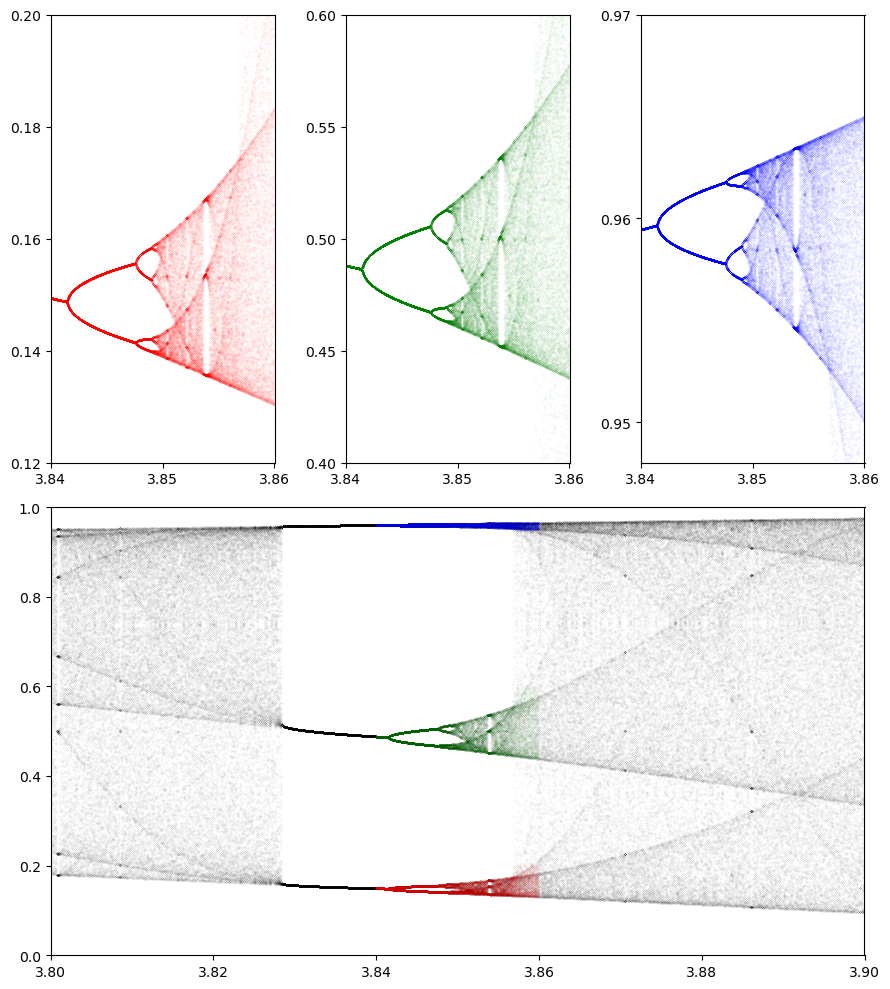

In [13]:
fig = plt.subplots(figsize=(9,10))

decim=5

ax1 = plt.subplot(212)
ax1.plot(rlist,endline,'o',markersize=0.02,color='black')
ax1.plot(rlistr[0::decim],endliner[0::decim],'or',markersize=0.02)
ax1.plot(rlistg[0::decim],endlineg[0::decim],'og',markersize=0.02)
ax1.plot(rlistb[0::decim],endlineb[0::decim],'ob',markersize=0.02)
ax1.set_xlim(3.8,3.9)
ax1.set_ylim(0,1)
ax1.set_xticks(np.arange(3.8,3.9,0.02))
ax1.set_yticks(np.arange(0,1.1,0.2))

ax2 = plt.subplot(231)
ax2.plot(rlistr,endliner,'or',markersize=0.02)
ax2.set_xlim(3.84,3.86)
ax2.set_ylim(0.12,0.2)
ax2.set_xticks(np.arange(3.84,3.86,0.01))
ax2.set_yticks(np.arange(0.12,0.21,0.02))

ax3 = plt.subplot(232)
ax3.plot(rlistg,endlineg,'og',markersize=0.02)
ax3.set_xlim(3.84,3.86)
ax3.set_ylim(0.4,0.6)
ax3.set_xticks(np.arange(3.84,3.86,0.01))
ax3.set_yticks(np.arange(0.4,0.61,0.05))

ax4 = plt.subplot(233)
ax4.plot(rlistb,endlineb,'ob',markersize=0.02)
ax4.set_xlim(3.84,3.86)
ax4.set_ylim(0.948,0.97)
ax4.set_xticks(np.arange(3.84,3.86,0.01))
ax4.set_yticks(np.arange(0.95,0.971,0.01))
plt.tight_layout()
plt.show()


### Equation du point fixe et stabilité


Pour $r<3.0$ on voit que la suite converge vers une seule valeur... essayons d'expliquer ça.

Une valeur stable, ça veut dire que pour $i$ grand on a $x_{i+1} = x_i$, soit $f(x_i) = x_i$ ou encore:

$$ r x_i (1-x_i) -x_i = 0$$

Cette équation admet 2 solutions, i.e. ce polynôme de degré 2 à 2 racines réelles : $0$ et $(r-1)/r$.

La solution $0$ est triviale et peu interessante, l'autre correspond bien à la branche unique pour $r<3.0$, comme on le montre ci-dessous.


temps écoulé : 1.0956852436065674


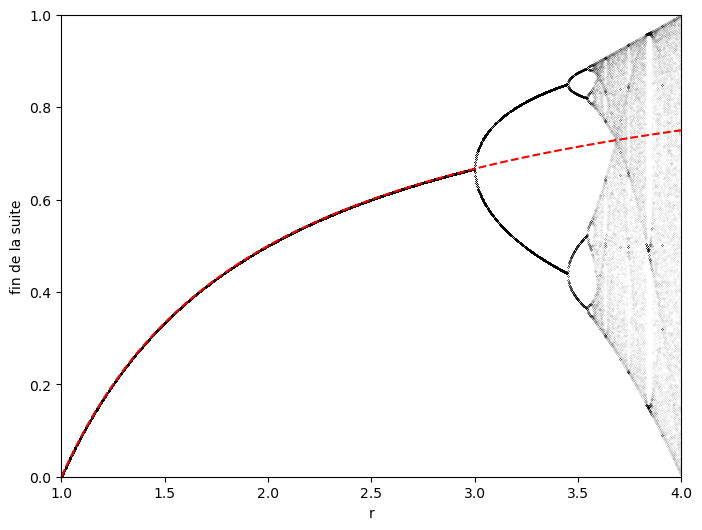

In [14]:
#on recalcule le diagramme de bifurcation
rliste=np.arange(1,4,0.002)

N=1000
Naff=100

debut = time.time()
findesuite=np.empty(len(rliste)*Naff).reshape(len(rliste),Naff)
for i in range(len(rliste)):
    findesuite[i]=suite(0.1,N,rliste[i])[-Naff:]

print("temps écoulé :", time.time()-debut)

#on le plote avec la solution unique trouvée
fig=plt.subplots(figsize=(8,6))
plt.plot(rliste,findesuite,'o',markersize=0.02,color='black')
plt.plot(rliste,(rliste-1)/rliste,'--r')
plt.xlim(1,4)
plt.ylim(0,1)
plt.xlabel("r")
plt.ylabel("fin de la suite")
plt.show()


La concordance est bien sur parfaite... mais pourquoi cette solution de marche plus pour $r>3.0$ ? 

Est-ce qu'elle n'est plus solution ? Et bien si... on peut le montrer, si on part de cette valeur on reste sur cette valeur, comme montré ci après... enfin presque !

temps écoulé : 1.1190407276153564


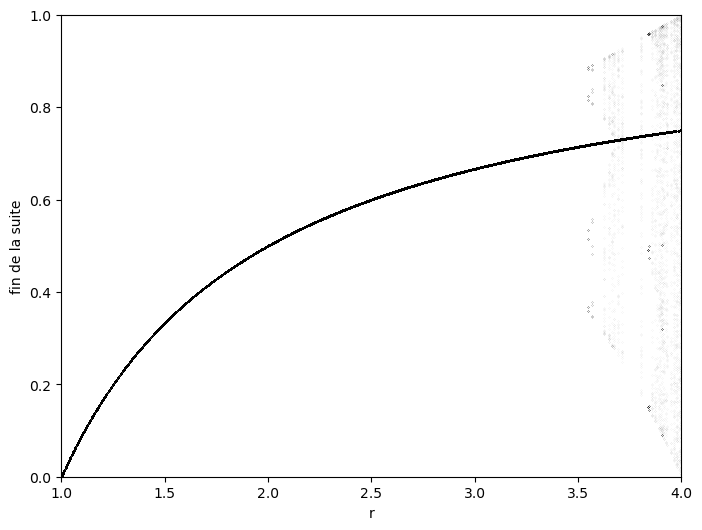

In [15]:
# même calcul mais cette fois, on part du point fixe

rliste=np.arange(1,4,0.002)

N=1000
Naff=100

debut = time.time()
findesuite=np.empty(len(rliste)*Naff).reshape(len(rliste),Naff)
for i in range(len(rliste)):
    findesuite[i]=suite((rliste[i]-1)/rliste[i],N,rliste[i])[-Naff:]

print("temps écoulé :", time.time()-debut)

#on le plote avec la solution unique trouvée
fig=plt.subplots(figsize=(8,6))
plt.plot(rliste,findesuite,'o',markersize=0.02,color='black')
plt.xlim(1,4)
plt.ylim(0,1)
plt.xlabel("r")
plt.ylabel("fin de la suite")
plt.show()


On remarque ici que ça "marche", sauf à certaines valeurs entre 3.5 et 4... Ces "erreurs" viennent certainement des erreurs numériques de calculs, car dans ces plages là, ce point fixe est instable.

En effet, si on prend comme point de départ, un point très proche du point fixe, on obtient bien le diagramme précédent.

temps écoulé : 1.0663352012634277


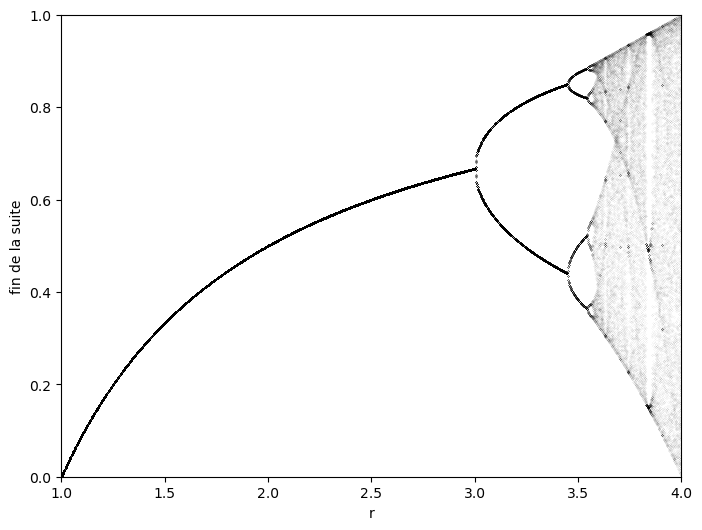

In [16]:
# même calcul mais cette fois, on part d'un point "proche" du point fixe à 1/10000 près

rliste=np.arange(1,4,0.002)

N=1000
Naff=100

debut = time.time()
findesuite=np.empty(len(rliste)*Naff).reshape(len(rliste),Naff)
for i in range(len(rliste)):
    findesuite[i]=suite(1.0001*(rliste[i]-1)/rliste[i],N,rliste[i])[-Naff:]

print("temps écoulé :", time.time()-debut)

#on le plote avec la solution unique trouvée
fig=plt.subplots(figsize=(8,6))
plt.plot(rliste,findesuite,'o',markersize=0.02,color='black')
plt.xlim(1,4)
plt.ylim(0,1)
plt.xlabel("r")
plt.ylabel("fin de la suite")
plt.show()


On trouve ainsi que la solution correspondant au point fixe est instable pour $r>3.0$ ... mais pourquoi ?

Essayons de trouver ce qui différencie un point fixe stable d'un point fixe instable avec un modèle plus simple : une fonction linéaire qui croise la droite $y=x$ au point $x=0.5$ avec une pente que nou ferons varier

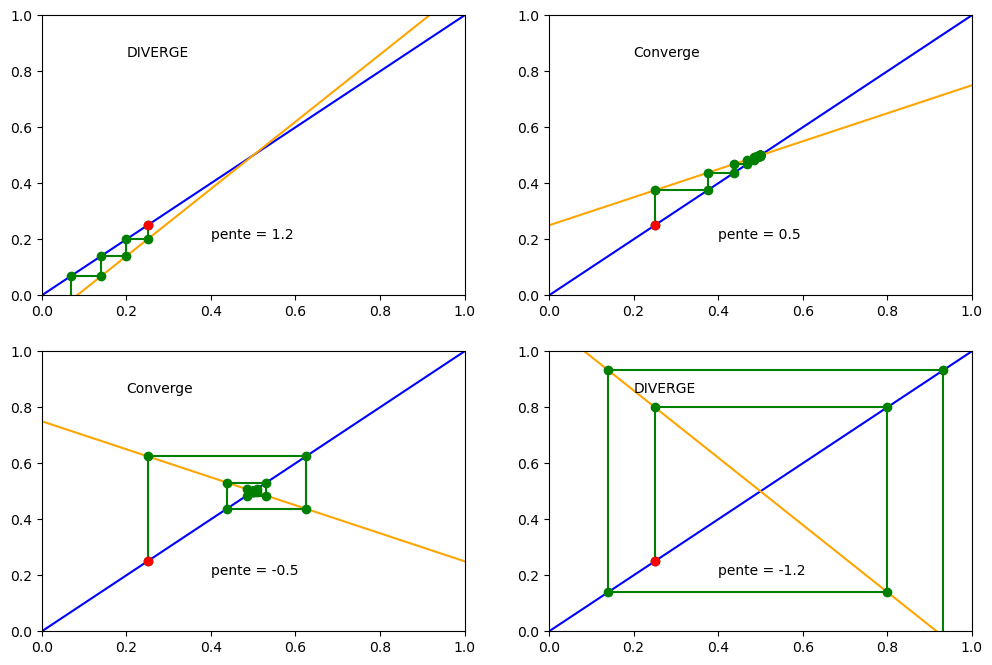

In [17]:
rl=[1.2,0.5,-0.5,-1.2]
x=np.linspace(0,1,10000)

def g(z,r):
    return r*(z-0.5)+0.5

fig, axes = plt.subplots(2,2,figsize=(12,8))
N=20
for li in range(4):
    r=rl[li]
    cax=axes[li//2][li%2]
    start=0.25
    z=suite(start,N,r,g)
    a,b=suitegraph(z)
    cax.plot(x,x,'-b')
    cax.plot(x,g(x,r),'-',color='orange')
    cax.plot(a,b,'-g')
    cax.plot(a,b,'og')
    cax.plot(a[0],b[0],'or')
    cax.set_xlim(0,1)
    cax.set_ylim(0,1)
    cax.text(0.4,0.2,"pente = "+str(r))
axes[0][0].text(0.2,0.85,"DIVERGE")
axes[0][1].text(0.2,0.85,"Converge")
axes[1][0].text(0.2,0.85,"Converge")
axes[1][1].text(0.2,0.85,"DIVERGE")
plt.show()

D'après ces comportements, on peut conclure que la condition de stabilité d'un point fixe est d'avoir une dérivée inférieure à 1 en valeur absolue !

Reprenons alors le diagramme en escalier que nous avons utilisé au début pour le cas $f(x)=x$, on voit bien que pour $r>1$ la pente au point fixe $x=0$ est supérieure à $1$. Ce point fixe est donc répulsif (ou instable), car en partant d'une valeur initiale proche du point fixe, les valeurs suivante s'en éloigne, comme on peut le voir ci-dessous.

A l'inverse, la pente au point fixe $x=1-1/r$ est inférieure à $1$ en valeur absolue, et le point fixe est attracteur (stable), comme on le voit ci-dessous à droite.

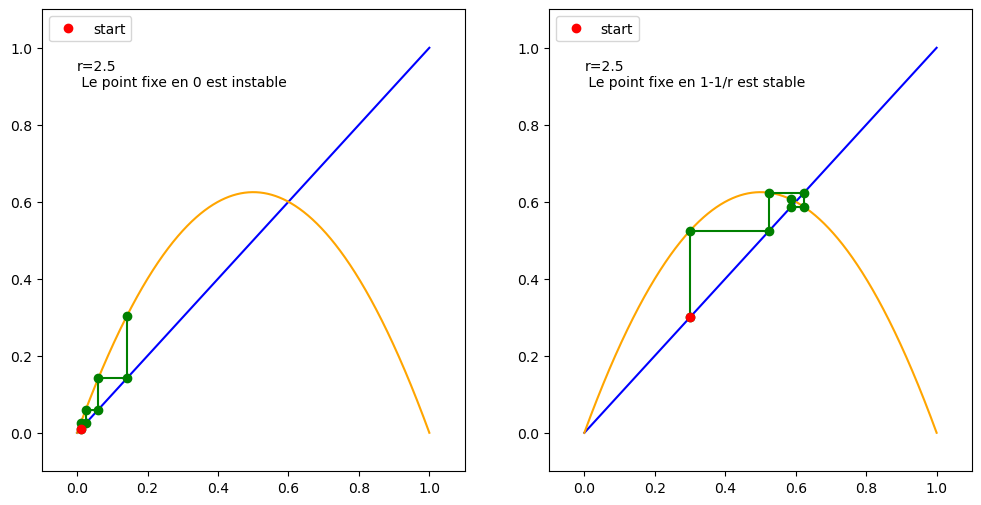

In [18]:
N = 5 # nombre de termes       
x=np.linspace(0,1,1000) #pour afficher f(x)

fig, axes = plt.subplots(1,2,figsize=(12,6))

r=2.5
cax=axes[0]
start=0.01
cax.plot(x,x,'-b')
cax.plot(x,f(x,r),'-',color='orange')
z=suite(start,N,r)
a,b=suitegraph(z)
cax.plot(a,b,'-o',color='g')
cax.plot(start,start,'o',color='red',label="start")
cax.text(0.0,0.9,"r="+str(int(r*10000)/10000.0)+"\n Le point fixe en 0 est instable")
cax.set_xlim(-0.1,1.1)
cax.set_ylim(-0.1,1.1)
cax.legend(loc=2)

cax=axes[1]
start=0.3
cax.plot(x,x,'-b')
cax.plot(x,f(x,r),'-',color='orange')
z=suite(start,N,r)
a,b=suitegraph(z)
cax.plot(a,b,'-o',color='g')
cax.plot(start,start,'o',color='red',label="start")
cax.text(0.0,0.9,"r="+str(int(r*10000)/10000.0)+"\n Le point fixe en 1-1/r est stable")
cax.set_xlim(-0.1,1.1)
cax.set_ylim(-0.1,1.1)
cax.legend(loc=2)

plt.tight_layout
plt.show()

On peut aussi montrer que le point fixe en $1-1/r$ n'est stable que pour $1<r<3$. En effet $f'(x)=r(1-2.x)$, donc la pente au point fixe est donnée par :
$$f'(1-1/r)= 2-r$$

et donc la pente au point fixe est bien inférieure à $1$ en valeur absolue entre $1$ et $3$...

### Diagramme à Plusieurs Points Fixes

Essayons déjà d'expliquer ce qui se passe entre $3$ et $\sim3.45$ où on voit deux valeurs stables, qui forment un cycle.

Comme nous l'avons vu dans la première partie, la suite prend tour à tour ces deux valeurs, elles sont donc solutions du système d'équations suivant :

$$ 
x_b = f(x_a) \\
x_a = f(x_b)
$$
que l'on peut réécrire par substitution :

$$ 
x_b=f(x_a)\\
f ( f(x_a)) - x_a = 0
$$

La dernière ligne est en fait un polynôme de degré 4, dont on connait déjà 2 racines, et les solutions du système :
- $ x_a (= x_b) = 0 $ la solution nulle
- $ x_a (= x_b) = (r-1)/r $ la solution point fixe

On peut donc réduire ce polynôme sous la forme :
$$f(f(x)) - x = K. x . (x-\frac{(r-1)}{r}) . [a x^2 + b x + c] . K $$

en développant et en identifiant terme à terme on peut trouver les valeurs de $a$, $b$ et $c$ ce qui donne :
$$f(f(x)) - x = -r^2 . x . (x-\frac{(r-1)}{r}) . [r x^2 -(r+1) x + \frac{(r+1)}{r}] $$

Le déterminant du polynôme de degré 2 est alors :
$$ \Delta = (r+1)^2 - 4.r.(r+1)/r = (r+1)(r-3) $$

On trouve donc que le déterminant n'accepte de solutions réelles que pour $r>3$ !

Dans ces conditions le polynôme entier (d'ordre 4) admet donc deux racines supplémentaires :
$$ x = \frac{r+1+\sqrt((r+1)(r-3))}{2r} \\
   x = \frac{r+1-\sqrt((r+1)(r-3))}{2r} $$
   
Dans la cellule ci-dessous on constate que ces solutions sont bien le début des branches qui commencent à $r=3$.

temps écoulé : 1.1046221256256104


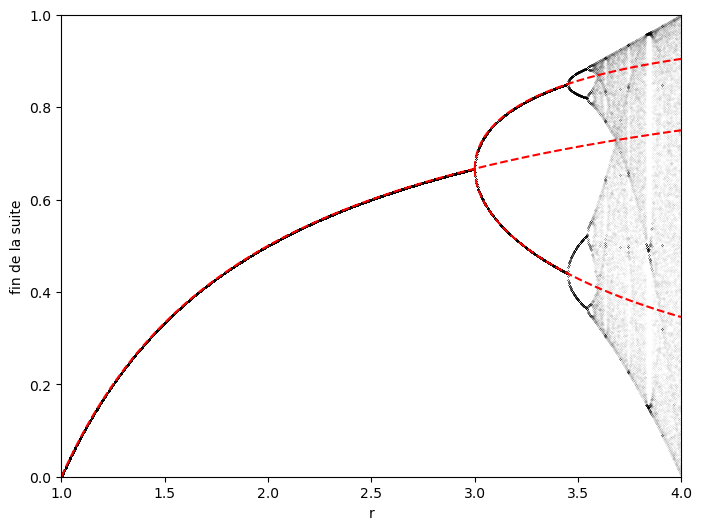

In [19]:
rliste=np.arange(1,4,0.002)
r3=rliste[rliste>3]

sol0=(rliste-1)/rliste
sol1=(1+r3+np.sqrt((1+r3)*(r3-3)))/(2*r3)
sol2=(1+r3-np.sqrt((1+r3)*(r3-3)))/(2*r3)

N=1000
Naff=100

debut = time.time()
findesuite=np.empty(len(rliste)*Naff).reshape(len(rliste),Naff)
for i in range(len(rliste)):
    findesuite[i]=suite(0.1,N,rliste[i])[-Naff:]

print("temps écoulé :", time.time()-debut)

#on le plote avec la solution unique trouvée
fig=plt.subplots(figsize=(8,6))
plt.plot(rliste,findesuite,'o',markersize=0.02,color='black')
plt.plot(rliste,sol0,'--r')
plt.plot(r3,sol1,'--r')
plt.plot(r3,sol2,'--r')
plt.xlim(1,4)
plt.ylim(0,1)
plt.xlabel("r")
plt.ylabel("fin de la suite")
plt.show()

Comme nous l'avons vu précédemment, la racine unique n'est stable qu'ne dessous de $r=3$... On peut donc se demander quel est le domaine de stabilité des deux racines doubles ?

Regardons d'abord la fonction $f(f(x))$ pour quelques valeurs de $r$

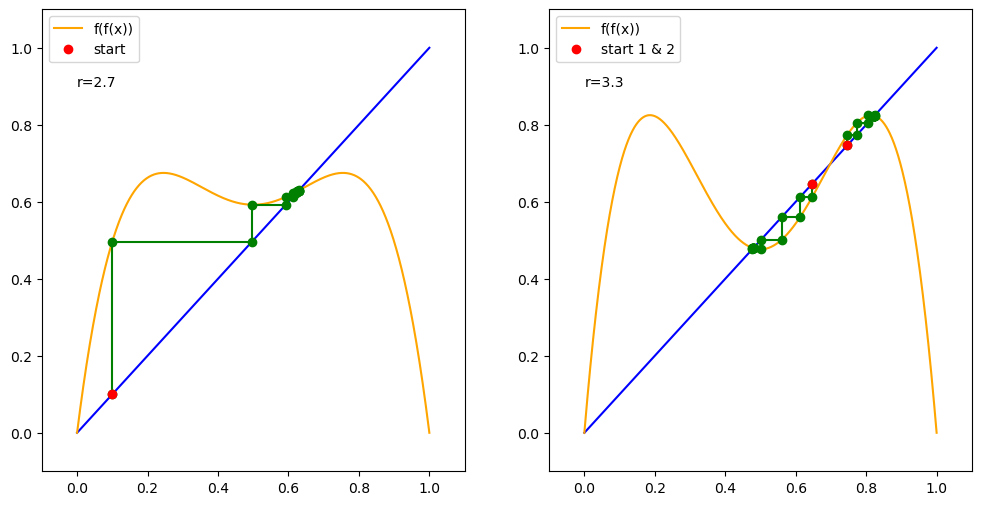

In [20]:
N = 10 # nombre de termes       
x=np.linspace(0,1,1000) #pour afficher f(x)

def g(z,r):
    return f(f(z,r),r)

fig, axes = plt.subplots(1,2,figsize=(12,6))


cax=axes[0]
r=2.7
start=0.1
cax.plot(x,x,'-b')
#cax.plot(x,f(x,r),'-',color='green',label="f(x)")
cax.plot(x,f(f(x,r),r),'-',color='orange',label="f(f(x))")
z=suite(start,N,r,g)
a,b=suitegraph(z)
cax.plot(a,b,'-o',color='g')
cax.plot(start,start,'o',color='red',label="start")
cax.text(0.0,0.9,"r="+str(int(r*10000)/10000.0))
cax.set_xlim(-0.1,1.1)
cax.set_ylim(-0.1,1.1)
cax.legend(loc=2)

cax=axes[1]
r=3.3
cax.plot(x,x,'-b')
#cax.plot(x,f(x,r),'-',color='green',label="f(x)")
cax.plot(x,f(f(x,r),r),'-',color='orange',label="f(f(x))")
start=1-1/r+0.05
z=suite(start,N,r,g)
a,b=suitegraph(z)
cax.plot(a,b,'-o',color='g')
cax.plot(start,start,'o',color='red',label="start 1 & 2")
start=1-1/r-0.05
z=suite(start,N,r,g)
a,b=suitegraph(z)
cax.plot(a,b,'-o',color='g')
cax.plot(start,start,'o',color='red')
cax.text(0.0,0.9,"r="+str(int(r*10000)/10000.0))
cax.set_xlim(-0.1,1.1)
cax.set_ylim(-0.1,1.1)
cax.legend(loc=2)

plt.tight_layout
plt.show()


On retrouve bien le comportement trouvé analytiquement : pour $r<3$ il n'ya qu'un point fixe non nul et il est stable, pour $r>3$ il y en a trois et deux d'entre eux apparaissent stable, au moins pour $r=3.3$...

On pourrait montrer (mais ça devient long à écrire) que ces deux points fixes sont en fait stable pour $r<1+\sqrt{6} \approx3.4494897$... on le verifie ci dessous avec les valeurs $r=3.4$ et $r=3.5$ .

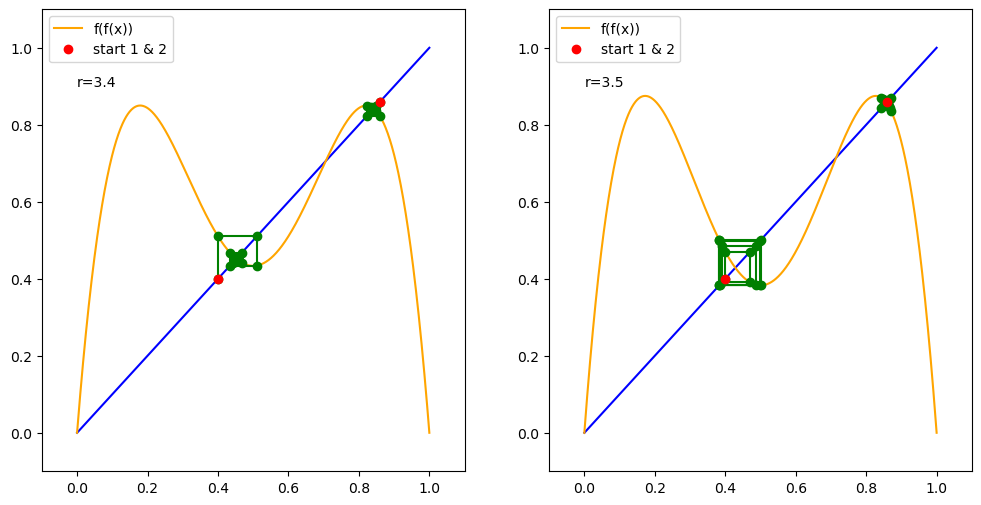

In [21]:
N = 10 # nombre de termes       
x=np.linspace(0,1,1000) #pour afficher f(x)

def g(z,r):
    return f(f(z,r),r)

fig, axes = plt.subplots(1,2,figsize=(12,6))


cax=axes[0]
r=3.4
cax.plot(x,x,'-b')
#cax.plot(x,f(x,r),'-',color='green',label="f(x)")
cax.plot(x,f(f(x,r),r),'-',color='orange',label="f(f(x))")
start=0.4
z=suite(start,N,r,g)
a,b=suitegraph(z)
cax.plot(a,b,'-o',color='g')
cax.plot(start,start,'o',color='red',label="start 1 & 2")
start=0.86
z=suite(start,N,r,g)
a,b=suitegraph(z)
cax.plot(a,b,'-o',color='g')
cax.plot(start,start,'o',color='red')
cax.text(0.0,0.9,"r="+str(int(r*10000)/10000.0))
cax.set_xlim(-0.1,1.1)
cax.set_ylim(-0.1,1.1)
cax.legend(loc=2)

cax=axes[1]
r=3.5
cax.plot(x,x,'-b')
#cax.plot(x,f(x,r),'-',color='green',label="f(x)")
cax.plot(x,f(f(x,r),r),'-',color='orange',label="f(f(x))")
start=0.4
z=suite(start,N,r,g)
a,b=suitegraph(z)
cax.plot(a,b,'-o',color='g')
cax.plot(start,start,'o',color='red',label="start 1 & 2")
start=0.86
z=suite(start,N,r,g)
a,b=suitegraph(z)
cax.plot(a,b,'-o',color='g')
cax.plot(start,start,'o',color='red')
cax.text(0.0,0.9,"r="+str(int(r*10000)/10000.0))
cax.set_xlim(-0.1,1.1)
cax.set_ylim(-0.1,1.1)
cax.legend(loc=2)

plt.tight_layout
plt.show()


### Ordres supérieurs et limite du diagramme de bifurcations

On pourrait augmenter indéfiniement l'ordre des points fixes et calculer leur stabilité avec l'équation $f(f(f( ... f(f(x)) ...))) = x$ mais ça devient rapidement long à développer à la main (le degré du polynôme augmente de 2 à chaque itération...)

On peut cependant visualiser certains éléments numériquement.

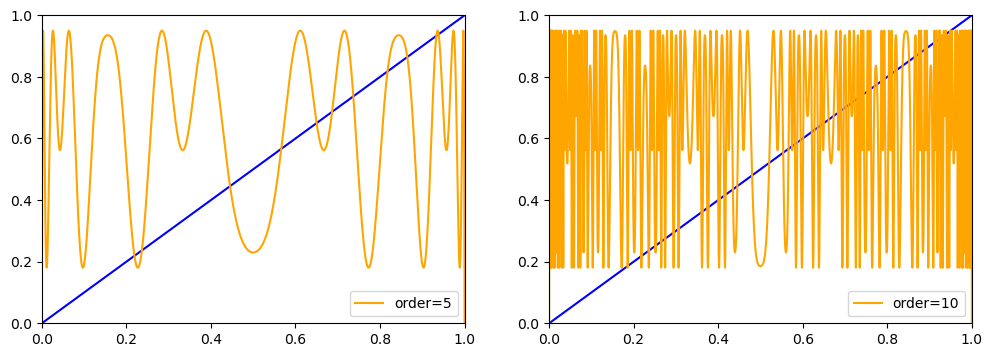

In [22]:
"""
plutot que de programmer le polynôme à la main nous allons invoquer deux fois la fonction f  !
"""
N=100000
x=np.linspace(0,1,N)

def polyf(x,r,n):
    """
    return the polynomial of f called n times
    """
    if n<1:
        return np.zeros(len(x))
    else:
        fx=f(x,r)
        for i in range(n-1):
            fx=f(fx,r)
        return fx


fig, axes=plt.subplots(1,2,figsize=(12,4))
cax=axes[0]
cax.plot(x,x,'-b')
cax.plot(x,polyf(x,3.8,5),'-',color='orange',label="order="+str(5))
cax.set_xlim(0,1)
cax.set_ylim(0,1)
cax.legend()

cax=axes[1]
cax.plot(x,x,'-b')
cax.plot(x,polyf(x,3.8,10),'-',color='orange',label="order="+str(10))
cax.set_xlim(0,1)
cax.set_ylim(0,1)
cax.legend()


plt.show()
    


On remarque ici une chose intéressante ! En augmentant l'ordre à une valeur de $r$ donnée on voit que les valeurs possibles d'un éventuel point fixe sont bornées !! 

On comprend bien sur que les valeurs prisent sont inférieures au max de la fonction $f$ dans l'intervalle $[0,1]$ c'est à dire $r/4$, mais dans la partie ''centrale'' du diagramme est aussi supérieure à $f(f(0.5)) = r^2 (4-r)/16$ pour $r>2.0$


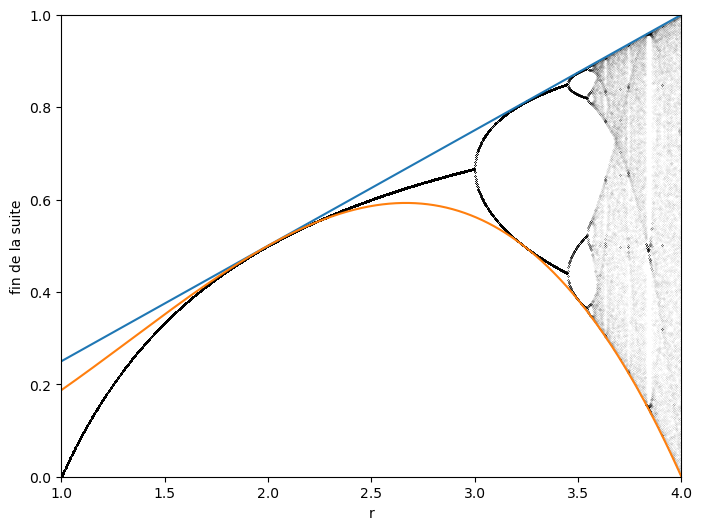

In [23]:
"""might be interesting, limits of biff diagram is r/4 and r^2*(4-r)/16 for r>2"""
fig=plt.subplots(figsize=(8,6))
plt.plot(rliste,findesuite,'o',markersize=0.02,color='black')
plt.plot(rliste,rliste/4.0,'-')
plt.plot(rliste,rliste*rliste*(4.0-rliste)/16.0,'-')
plt.xlim(1,4)
plt.ylim(0,1)
plt.xlabel("r")
plt.ylabel("fin de la suite")
plt.show()


On pourrait sans doute trouver numériquement des valeurs stables pour n'importe quel ordre de l'équation multi-récursive ontrée précédemment, mais cela demanderait pas mal de temps...

Une question plus interessante (cependant sans réponse de ma part) serait : peut-on trouver une plage de $r$ sans AUCUNE valeur stable quel que soit l'ordre ??

En fait, pour toute valeur de $r$ on peut 'trouver' s'il existe un ordre simplement en regardant les répétitions dans la suite obtenue !

In [24]:
   
def findrepeat(r,start,Nskip,Nmax,Treshold,PrintProg):
    """
    cette fonction essaye de trouver des termes qui se répètent dans la suite, 
    la suite part de start et on calcule d'abord Nskip termes 
    On essaye ensuite de trouver un terme de la suite égal au terme Nskip
    """
    debut = time.time()
    #Calculons d'abord Nskip termes
    lasuite=suite(start,Nskip,r)

    #Ensuite, faison un boucle et on arrêtera quand on retombera sur la même valeur !

    GoOn=True
    target=lasuite[-1]
    newval=target
    ind=0
    
    if PrintProg:
            print('\nProgression :')
            print('_'*100,"END")
            print('|',end='')
    while GoOn:
        ind=ind+1
        newval=f(newval,r)
        if abs(newval-target)<=Treshold:
            if PrintProg:
                print("\nFound for r=",r)
                print("Value  =",newval,'at index',ind)
                print("Target =",target)
            GoOn=False
        if ind%(Nmax//100)==0 and PrintProg:
            print('|',end='')
        if ind>Nmax:
            if PrintProg:
                print("\nStop ! Max reached without finding target")
            GoOn=False

    if PrintProg:
        print("temps écoulé :", time.time()-debut)
    return ind, newval

Nmax=1e5
r=3.5726
a=findrepeat(r,0.1,10000,Nmax,0,True)

r=3.57262030
a=findrepeat(r,0.1,10000,Nmax,0,True)



Progression :
____________________________________________________________________________________________________ END
|
Found for r= 3.5726
Value  = 0.38335667387165134 at index 24
Target = 0.38335667387165134
temps écoulé : 0.006999492645263672

Progression :
____________________________________________________________________________________________________ END
|
Found for r= 3.5726203
Value  = 0.3686798829586872 at index 72
Target = 0.3686798829586872
temps écoulé : 0.008171796798706055


Ainsi pour ces deux valeurs de $r$ très proches on obtient numériquement un cycle à 24 termes, et un cycle à 72 termes... on peut aussi en trouver des beaucoup plus grands ! Cependnant pour certaines valeurs on ne trouve rien même après $10^7$ termes !

In [25]:
r=3.680000
Nmax=1e7
a=findrepeat(r,0.1,10000,Nmax,2e-14,True)


Progression :
____________________________________________________________________________________________________ END
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Stop ! Max reached without finding target
temps écoulé : 10.211745262145996


Posons nous ici deux minutes : peut-on être sûr qu'un nombre infini de pas ne se répètera pas ? Il est difficile de compter l'infini (c'est un peu long)... 

Mais de toute façon, nous travaillons sur un ordinateur qui, outre le fait de ne pas trop avoir le temps de compter jusqu'à l'infini, ne sait pas non plus ce que sont les maths ou les nombres... En effet, tous les nombres que python est capable de représenter sont des floats, avec une certaine précision, et donc un certain nombre de bit représentant ce nombre... 

DONC, même si mathématiquement la liste ne se répèterait jamais, ou au bout d'un compte infini, en pratique, le code python le répètera tôt ou (vraisemblablement) tard, car il ne peut représenter une précision infinie sur les float...

Par défaut, les float sont ici des numpy.float64 :

In [26]:
type(a[1])

numpy.float64

Ce que signifie ce format, c'est que le nombre est enregistré comme l'équivalent d'une notation scientifique binaire avec 64 bits dont : 1 bit de signe, 11 bits d'exposants, et 52 bits de "décimales" (binimales ?)...

Le bit de signe étant toujours le même, et comme les valeurs rencontrées ici sont toutes comprises entre 0.2 et 1 (pour $r=3.68$ du moins) les bits d'exposants seront aussi globalement les mêmes (à 1 ou 2 bit prés)... la suite de bit définissant les décimales est donc la plus critique : il y a donc $2^{52}$ possibilités de décimales, soit plus de 4 milliards de milliards de possibilités... ça risque d'être long...

In [27]:
print("2^52 =",2**52)

2^52 = 4503599627370496


On arrive ici aux limites de ce qu'on peut faire numériquement à ce niveaux de précisions...